In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df=pd.read_csv('quikr_car.csv')

In [5]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [6]:
df.shape

(892, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [8]:
backup = df.copy()

In [9]:
df=df[df['Price']!='Ask For Price']

In [10]:

df.shape

(857, 6)

In [11]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    38
fuel_type     41
dtype: int64

In [12]:
df=df.dropna(how='any')

In [13]:
df['kms_driven'].value_counts()

45,000 kms      30
35,000 kms      29
55,000 kms      25
50,000 kms      23
20,000 kms      21
                ..
1,00,200 kms     1
65 kms           1
30,874 kms       1
1,03,553 kms     1
1,32,000 kms     1
Name: kms_driven, Length: 248, dtype: int64

In [14]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [15]:
df=df[df['kms_driven'].str.isnumeric()]
df['kms_driven']=df['kms_driven'].astype(int)

In [16]:
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 816, dtype: int32

In [17]:

df.shape

(816, 6)

In [18]:
df['year'].value_counts()

2015    111
2013     94
2014     92
2012     75
2016     74
2011     59
2009     54
2017     53
2010     43
2018     30
2006     22
2007     19
2019     18
2008     16
2005     13
2003     13
2004     12
2000      7
2001      5
2002      4
1995      2
Name: year, dtype: int64

In [19]:
df['year']=df['year'].astype('int32')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    object
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [21]:
df['Price']=df['Price'].str.replace(',','')

In [22]:
df['Price']=df['Price'].astype('int32')

In [23]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
436,Ford EcoSport Trend 1.5L TDCi,Ford,2013,495000,38000,Diesel
182,Hyundai i20,Hyundai,2009,199000,31000,Petrol
175,Mahindra XUV500,Mahindra,2014,699999,52000,Diesel
233,Renault Kwid RXT,Renault,2017,340000,5000,Petrol
586,Mahindra XUV500 W6,Mahindra,2013,549900,52800,Diesel


<AxesSubplot:>

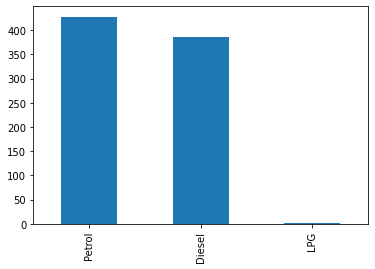

In [24]:
df['fuel_type'].value_counts().plot(kind='bar')

In [25]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [26]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [27]:
df=df.reset_index(drop=True)

In [28]:
df.shape

(816, 6)

In [29]:
df['company'].nunique()

25

<AxesSubplot:>

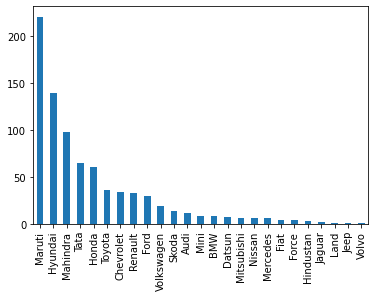

In [30]:
df['company'].value_counts().plot(kind='bar')

In [31]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [32]:
df=df[df['Price']<6000000]

In [33]:
df.shape

(815, 6)

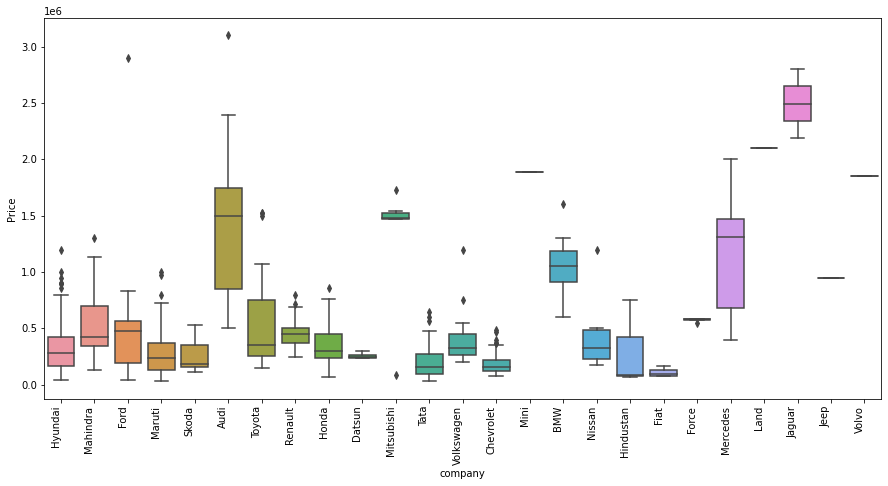

In [34]:
plt.subplots(figsize=(15,7))
ax=sb.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation='vertical',ha='right')
plt.show()

c:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


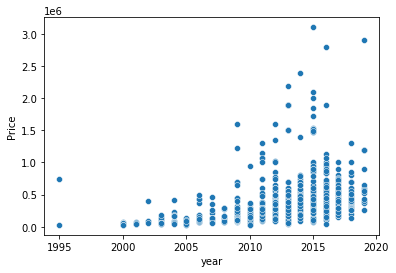

In [35]:
sb.scatterplot(df['year'],df['Price'])
plt.show()

c:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kms_driven', ylabel='Price'>

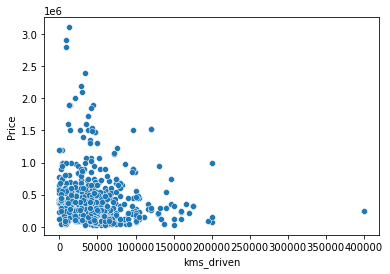

In [36]:
sb.scatterplot(df['kms_driven'],df['Price'])

c:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Hyundai'),
  Text(1, 0, 'Mahindra'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Maruti'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Renault'),
  Text(8, 0, 'Honda'),
  Text(9, 0, 'Datsun'),
  Text(10, 0, 'Mitsubishi'),
  Text(11, 0, 'Tata'),
  Text(12, 0, 'Volkswagen'),
  Text(13, 0, 'Chevrolet'),
  Text(14, 0, 'Mini'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Nissan'),
  Text(17, 0, 'Hindustan'),
  Text(18, 0, 'Fiat'),
  Text(19, 0, 'Force'),
  Text(20, 0, 'Mercedes'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'Jaguar'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Volvo')])

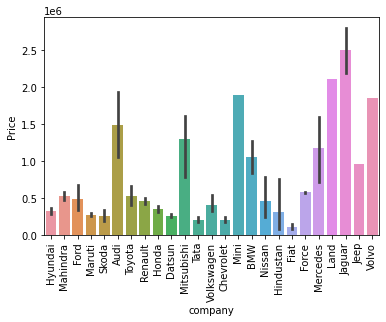

In [37]:
sb.barplot(df['company'],df['Price'])
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='year', ylabel='company'>

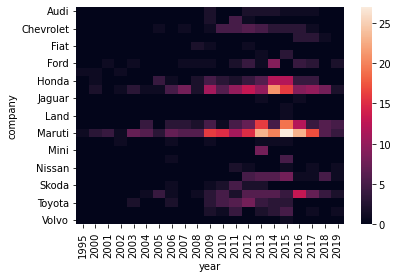

In [38]:
sb.heatmap(pd.crosstab(df['company'],df['year']))

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

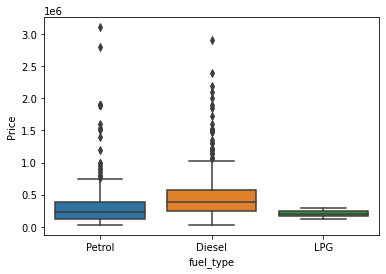

In [39]:
sb.boxplot(x='fuel_type',y='Price',data=df)

In [40]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
632,Maruti Suzuki Ertiga,Maruti,2013,475000,48000,Diesel
196,Maruti Suzuki Swift,Maruti,2006,135000,45000,Petrol
382,Maruti Suzuki Ertiga,Maruti,2013,450000,90000,Diesel
724,Hyundai Santro,Hyundai,2002,60000,47000,Petrol
152,Datsun Redi GO,Datsun,2016,245000,7000,Petrol


In [41]:
X=df[['name','company','year','kms_driven','fuel_type']]

In [42]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [43]:
y=df[['Price']]

In [44]:
y

,Price
0,80000
1,425000
2,325000
3,575000
4,175000
...,...
811,270000
812,110000
813,300000
814,260000


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [48]:
oh = OneHotEncoder()

In [49]:
oh.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [50]:
column_trans=make_column_transformer((OneHotEncoder(categories=oh.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [51]:
lr=LinearRegression()

In [52]:
pipe=make_pipeline(column_trans,lr)

In [53]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [54]:
from sklearn.metrics import r2_score

In [55]:
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7589172552550767

In [56]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [57]:
scores[np.argmax(scores)]

0.920088412025344

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.920088412025344

In [59]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))[0]

array([416109.14071676])